$$\Large \textit{C0708 | Reconocimiento de Patrones}$$

$$\large \textbf{Challenge N°3 | Visualización, pre-procesamiento de datos, creación de modelo 
y métricas de evaluación}$$


_Integrantes:_

* _Giovanni Taco_

* _Francisco Ruiz_

#### Carga de librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Importacion del dataset

In [2]:
df = pd.read_csv("train.csv")
df.head()

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis
0,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lyme_disease
1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tungiasis
2,2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,Lyme_disease
3,3,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zika
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,Rift_Valley_fever


In [3]:
df.isnull().any() # Se verifican que filas tienen valores nulos

id                False
sudden_fever      False
headache          False
mouth_bleed       False
nose_bleed        False
                  ...  
ulcers            False
toenail_loss      False
speech_problem    False
bullseye_rash     False
prognosis         False
Length: 66, dtype: bool

In [4]:
# Se verifican cuantos valores únicos hay en cada feature. Esto podría ayudarnos a saber
# si necesitamos un algoritmo de clasificación o regresión, además de identificar la variable Target
for col in df.columns:
      print(col, ":",df[col].nunique())

id : 707
sudden_fever : 2
headache : 2
mouth_bleed : 2
nose_bleed : 2
muscle_pain : 2
joint_pain : 2
vomiting : 2
rash : 2
diarrhea : 2
hypotension : 2
pleural_effusion : 2
ascites : 2
gastro_bleeding : 2
swelling : 2
nausea : 2
chills : 2
myalgia : 2
digestion_trouble : 2
fatigue : 2
skin_lesions : 2
stomach_pain : 2
orbital_pain : 2
neck_pain : 2
weakness : 2
back_pain : 2
weight_loss : 2
gum_bleed : 2
jaundice : 2
coma : 2
diziness : 2
inflammation : 2
red_eyes : 2
loss_of_appetite : 2
urination_loss : 2
slow_heart_rate : 2
abdominal_pain : 2
light_sensitivity : 2
yellow_skin : 2
yellow_eyes : 2
facial_distortion : 2
microcephaly : 2
rigor : 2
bitter_tongue : 2
convulsion : 2
anemia : 2
cocacola_urine : 2
hypoglycemia : 2
prostraction : 2
hyperpyrexia : 2
stiff_neck : 2
irritability : 2
confusion : 2
tremor : 2
paralysis : 2
lymph_swells : 2
breathing_restriction : 2
toe_inflammation : 2
finger_inflammation : 2
lips_irritation : 2
itchiness : 2
ulcers : 2
toenail_loss : 2
speech_pro

In [5]:
# Ahora debemos revisar si es que existen datos repetidos
df.duplicated().sum()

0

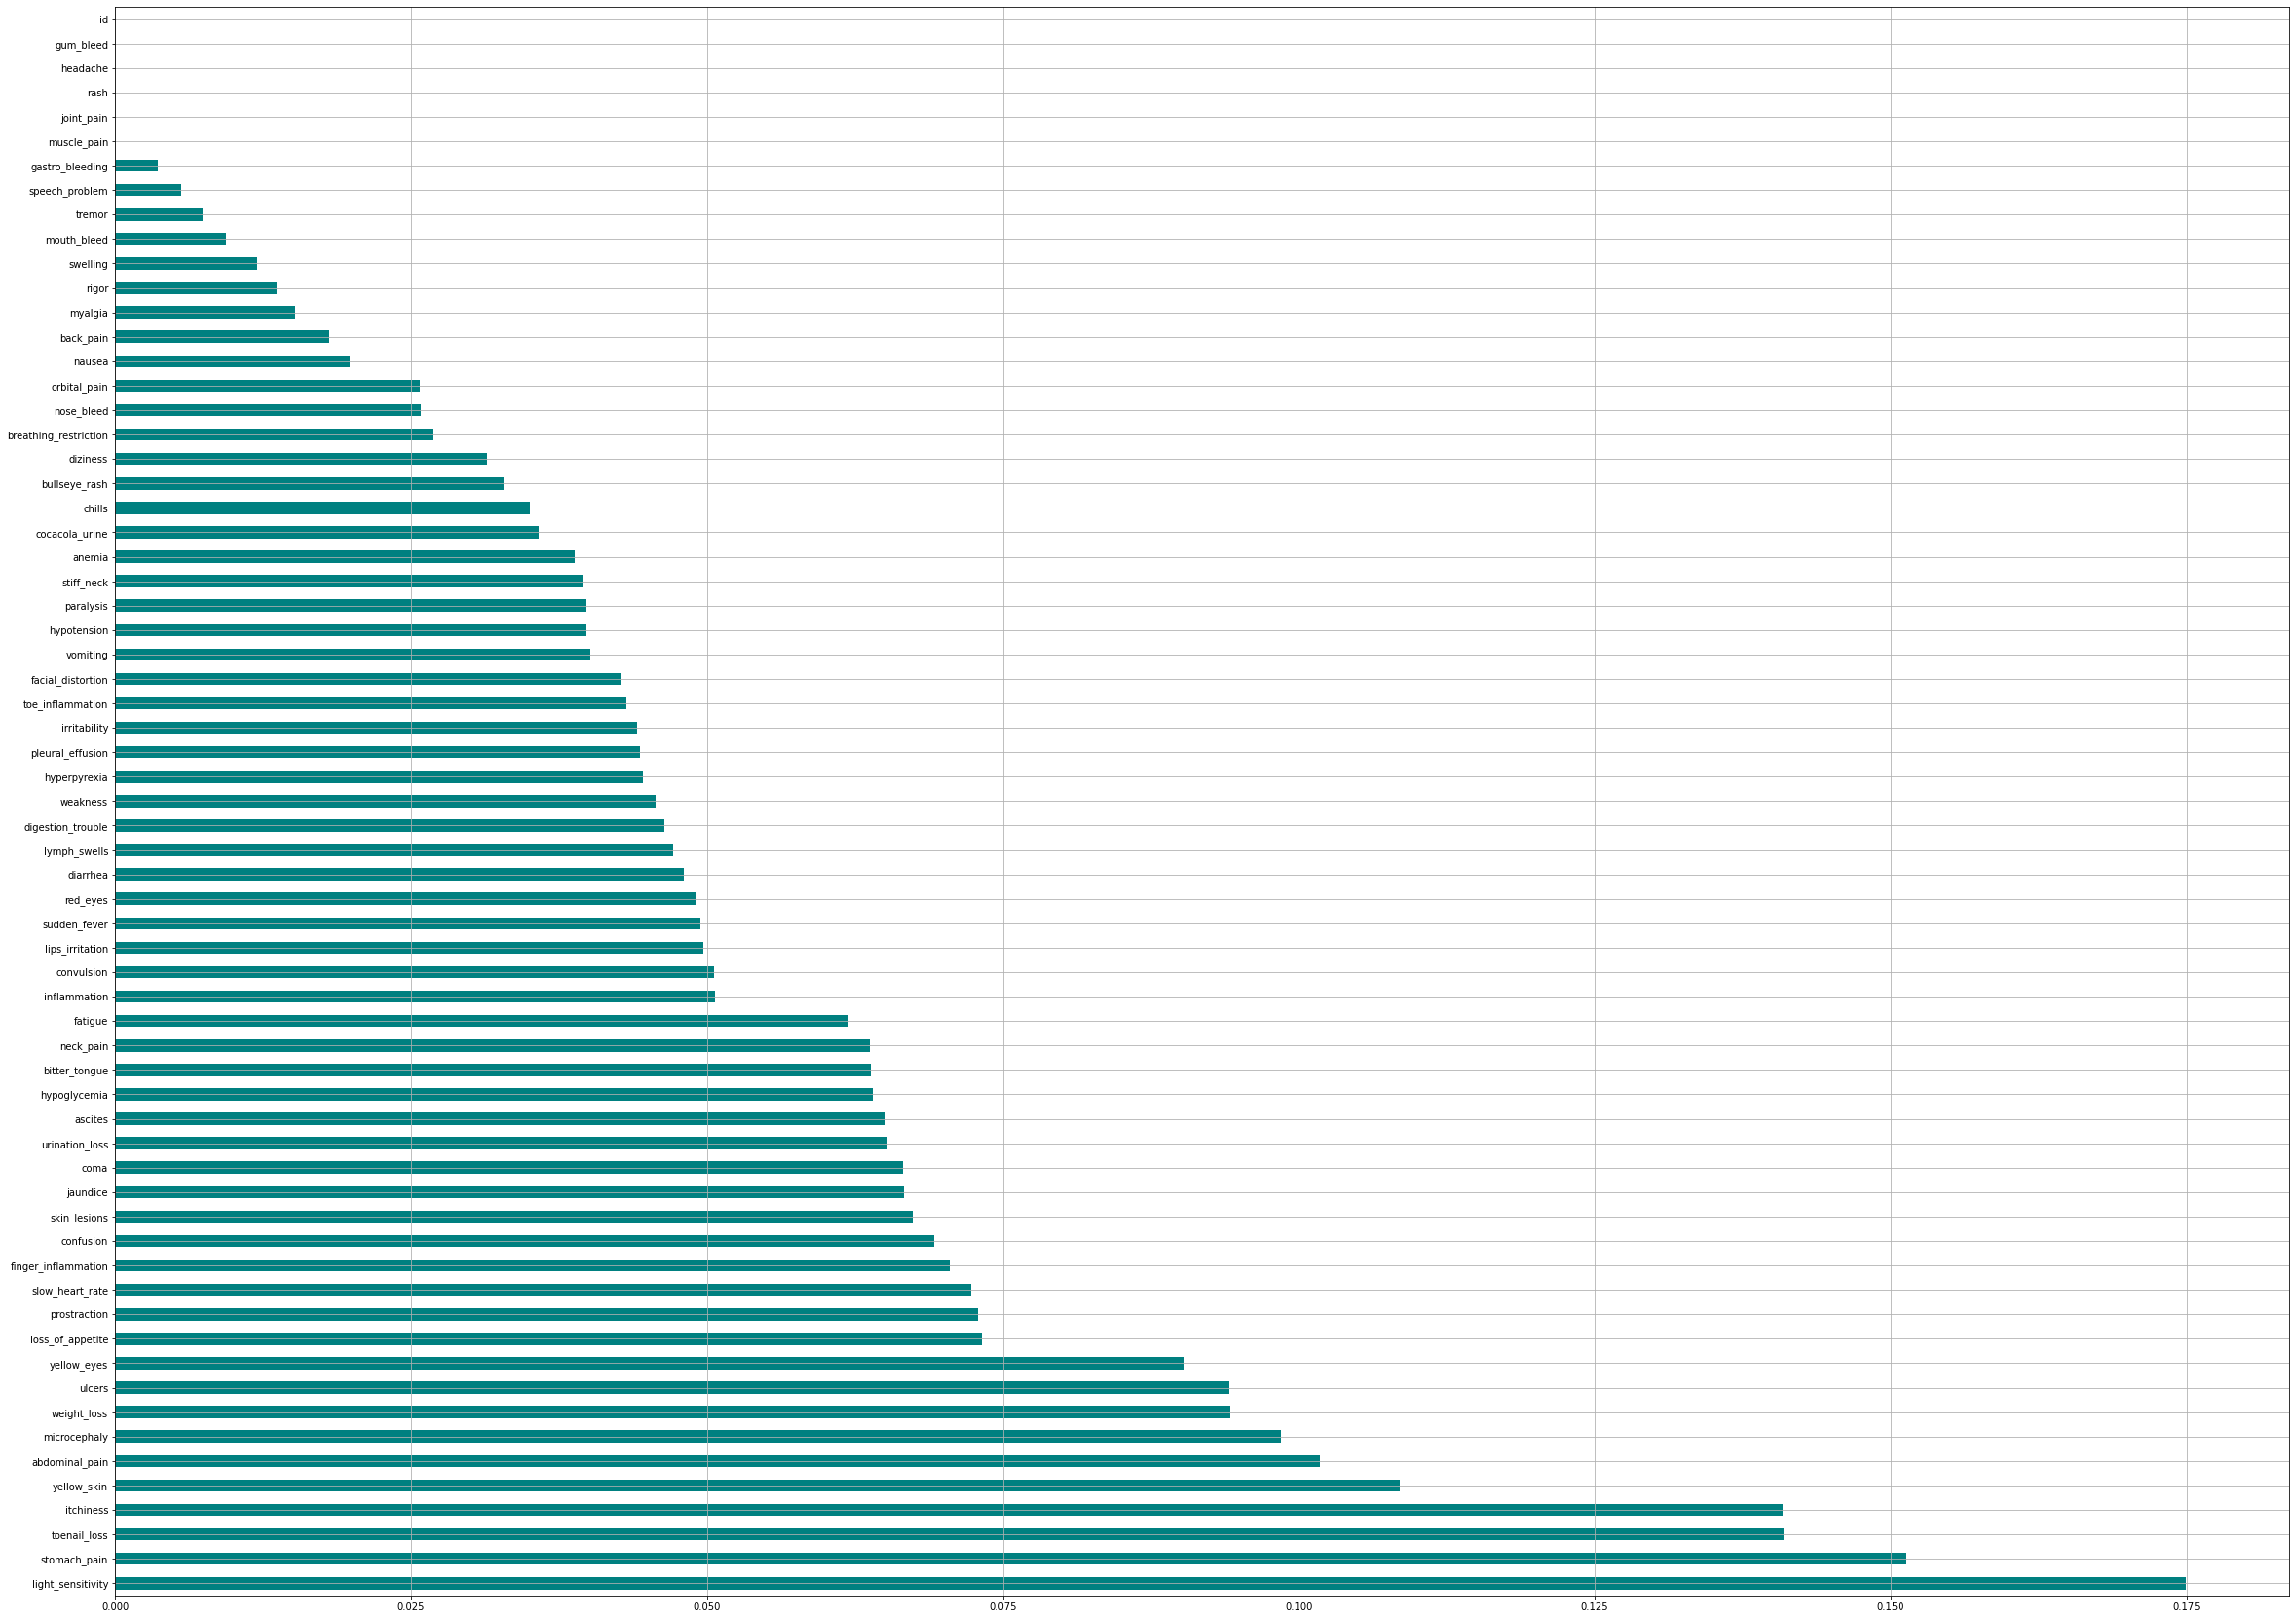

In [6]:
#Obtenemos los parametros con mayor relacion con respecto a la variable target
from sklearn.feature_selection import mutual_info_classif
plt.figure(figsize=(40,30))
importances=mutual_info_classif(df.iloc[:,:-1],df.iloc[:,-1],discrete_features=False, random_state=0)
feat_importances=pd.Series(importances,df.columns[:-1]) 
#Ordenamos de manera descendente 
feat_importances = feat_importances.sort_values(ascending=False)
feat_importances.plot(kind='barh',color='teal')
plt.grid()
plt.show()

In [7]:
feat_importances[:20] #Encontramos las 20 caracteristicas que más se relacionan con la variable Target


light_sensitivity      0.174933
stomach_pain           0.151326
toenail_loss           0.140991
itchiness              0.140876
yellow_skin            0.108552
abdominal_pain         0.101764
microcephaly           0.098452
weight_loss            0.094226
ulcers                 0.094097
yellow_eyes            0.090243
loss_of_appetite       0.073252
prostraction           0.072928
slow_heart_rate        0.072356
finger_inflammation    0.070507
confusion              0.069203
skin_lesions           0.067388
jaundice               0.066636
coma                   0.066587
urination_loss         0.065210
ascites                0.065069
dtype: float64

In [8]:
x = df[["light_sensitivity", "stomach_pain", "toenail_loss", "itchiness", "yellow_skin",
"abdominal_pain", "microcephaly", "weight_loss", "ulcers", "yellow_eyes", "loss_of_appetite",
"prostraction", "slow_heart_rate", "finger_inflammation", "confusion", "skin_lesions", "jaundice",
"coma", "urination_loss", "ascites"]]
y = df [["prognosis"]]

x

,light_sensitivity,stomach_pain,toenail_loss,itchiness,yellow_skin,abdominal_pain,microcephaly,weight_loss,ulcers,yellow_eyes,loss_of_appetite,prostraction,slow_heart_rate,finger_inflammation,confusion,skin_lesions,jaundice,coma,urination_loss,ascites
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
703,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
704,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
705,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0


In [9]:
df_new=pd.concat([pd.DataFrame(x,columns=["light_sensitivity", "stomach_pain", "toenail_loss", "itchiness", "yellow_skin",
"abdominal_pain", "microcephaly", "weight_loss", "ulcers", "yellow_eyes", "loss_of_appetite",
"prostraction", "slow_heart_rate", "finger_inflammation", "confusion", "skin_lesions", "jaundice",
"coma", "urination_loss", "ascites"]),pd.DataFrame(y,columns=['prognosis'])],axis=1)
df_new

,light_sensitivity,stomach_pain,toenail_loss,itchiness,yellow_skin,abdominal_pain,microcephaly,weight_loss,ulcers,yellow_eyes,...,prostraction,slow_heart_rate,finger_inflammation,confusion,skin_lesions,jaundice,coma,urination_loss,ascites,prognosis
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,Lyme_disease
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Tungiasis
2,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,Lyme_disease
3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,Zika
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Rift_Valley_fever
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,Plague
703,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Malaria
704,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,Zika
705,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,Plague


In [10]:
#Realizamos LabelEncoding para trabajar con variables categoricas
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in df_new.columns: 
    if df_new[col].dtype == 'object':
        df_new[col] = encoder.fit_transform(df_new[col].values) # realizamos un labelEncoding a la variable target
df_new

,light_sensitivity,stomach_pain,toenail_loss,itchiness,yellow_skin,abdominal_pain,microcephaly,weight_loss,ulcers,yellow_eyes,...,prostraction,slow_heart_rate,finger_inflammation,confusion,skin_lesions,jaundice,coma,urination_loss,ascites,prognosis
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7
2,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,3
3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,10
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5
703,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4
704,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,10
705,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,5


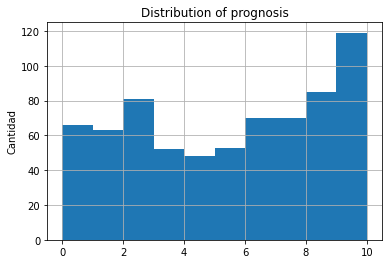

In [11]:
plt.hist(df_new['prognosis'])
plt.title(('Distribution of ' +  'prognosis'))
plt.grid()
plt.ylabel("Cantidad")
plt.show()


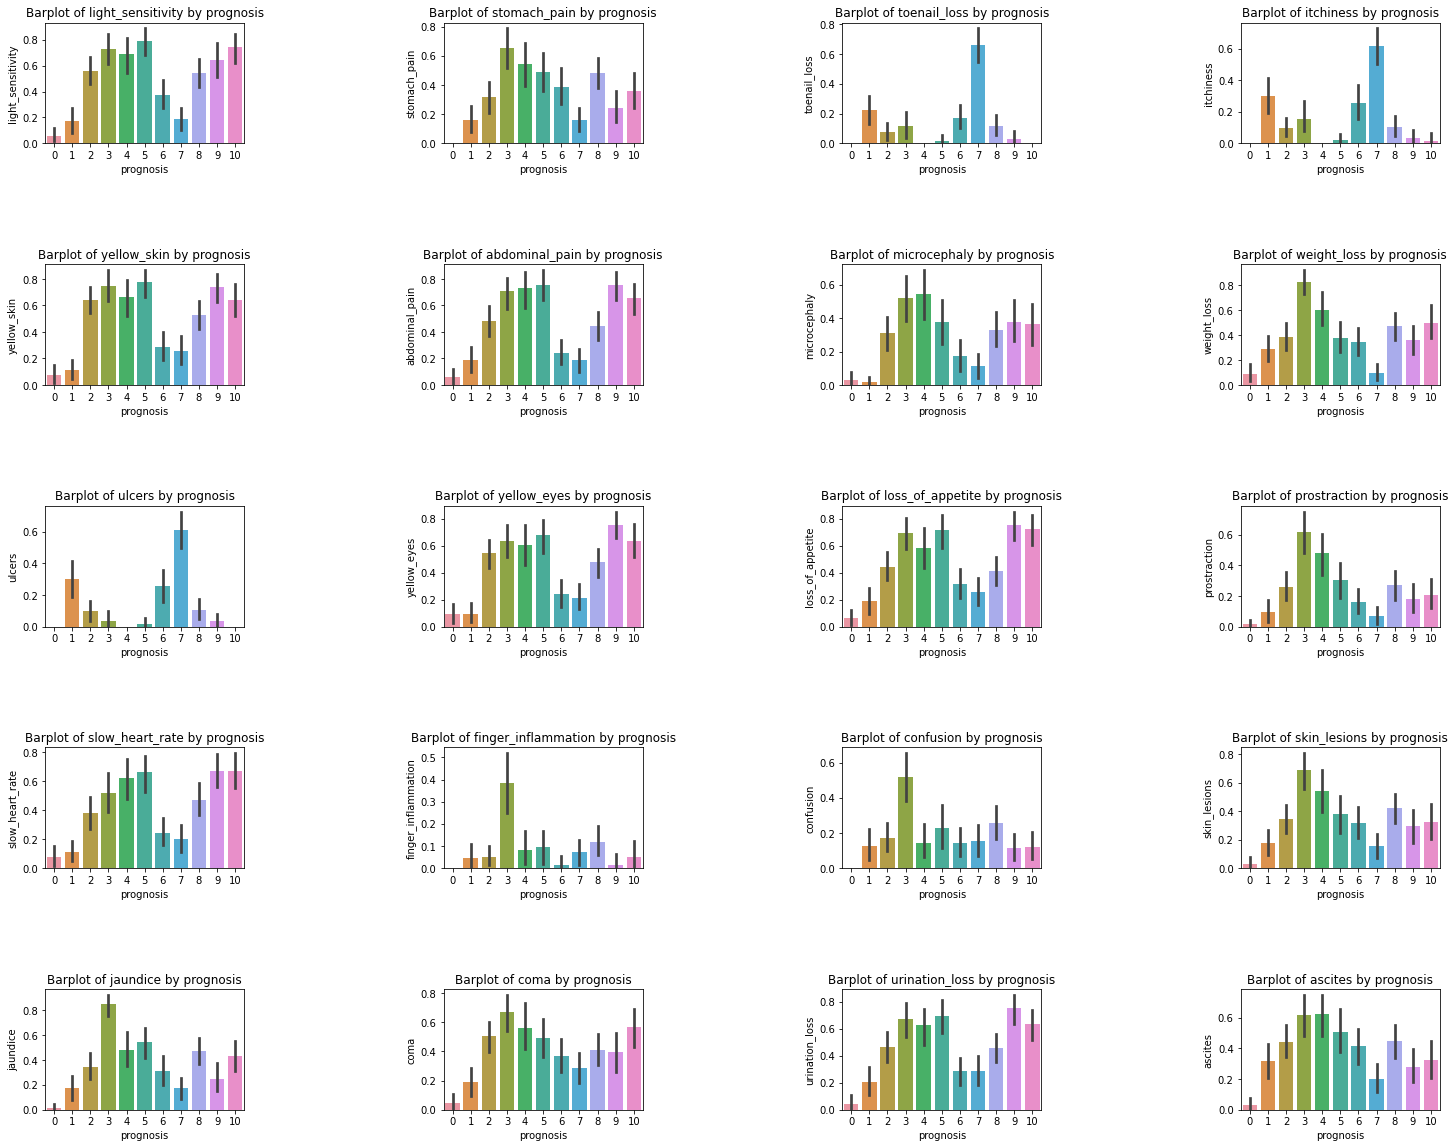

In [12]:
fig, axs = plt.subplots(5, 4, figsize=(25, 20))
plt.subplots_adjust(hspace=1, wspace=1)
list_aux = [] 
for i in range(0,5):
    for j in range(0,4):
        for col in df_new.columns:
            if col != 'prognosis' and col not in list_aux:
                sns.barplot(ax = axs[i,j], x='prognosis',y= col ,data=df_new)
                axs[i,j].set_title(f'Barplot of { col } by prognosis')
                plt.xlabel('prognosis')
                #plt.ylabel(col)
                list_aux.append(col) 
                break
plt.show()

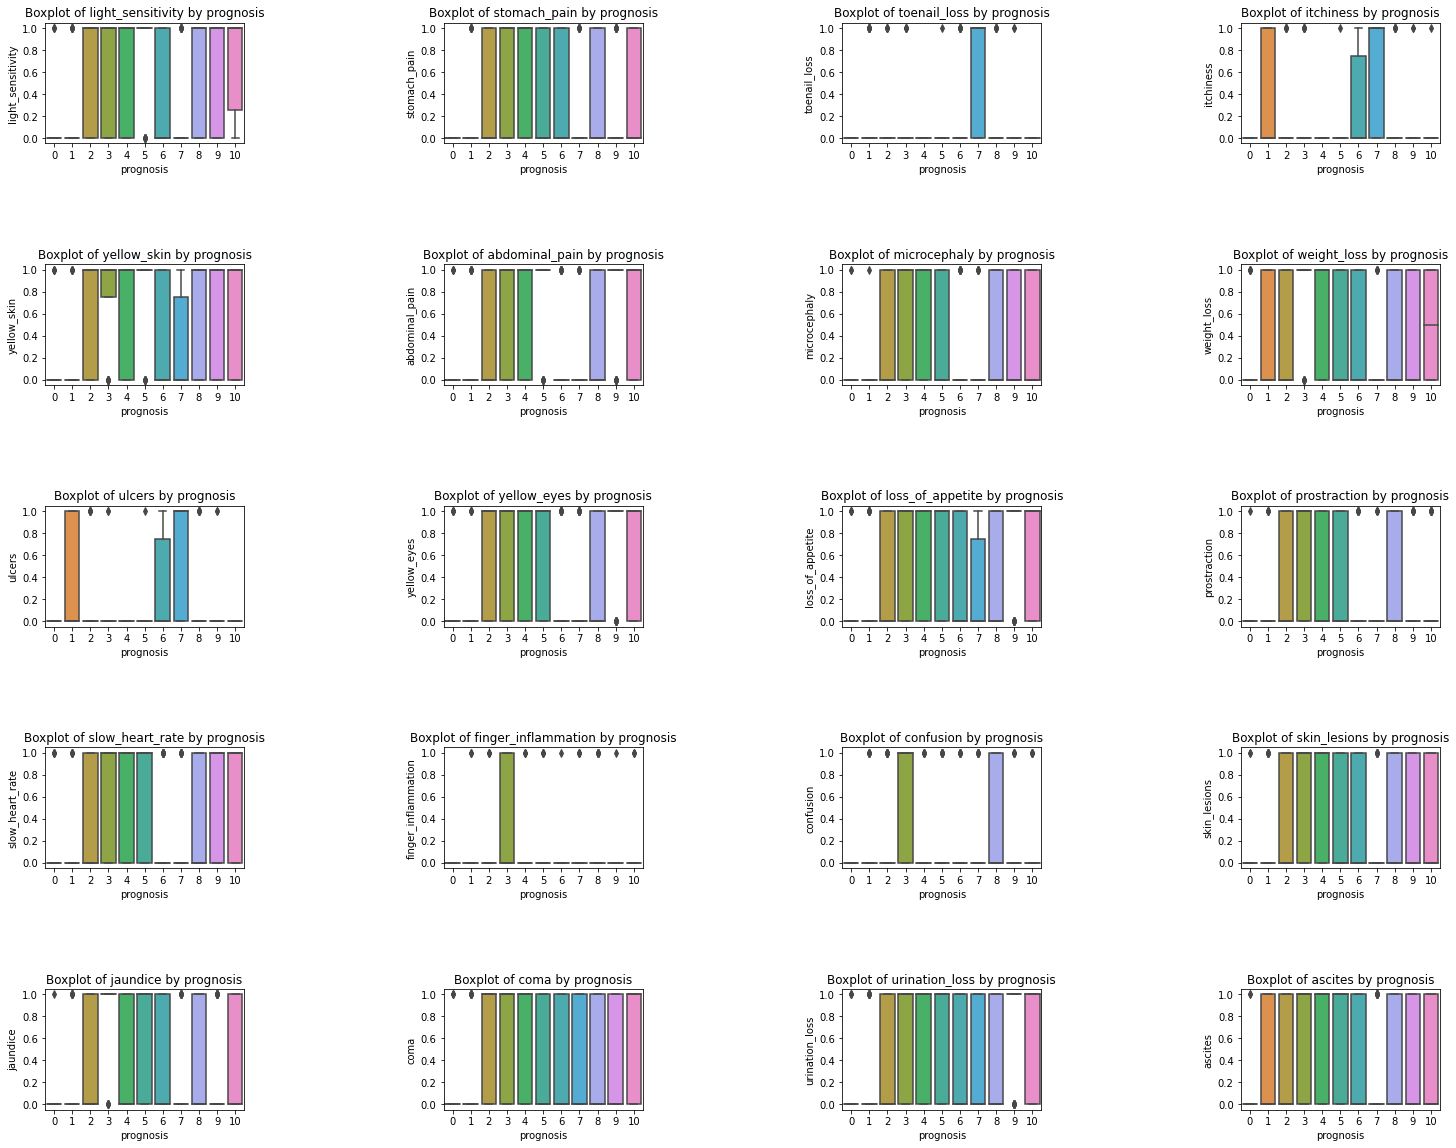

In [13]:
fig, axs = plt.subplots(5, 4, figsize=(25, 20))
plt.subplots_adjust(hspace=1, wspace=1)
list_aux = [] 
for i in range(0,5):
    for j in range(0,4):
        for col in df_new.columns:
            if col != 'prognosis' and col not in list_aux:
                sns.boxplot(ax = axs[i,j], x='prognosis',y= col ,data=df_new)
                axs[i,j].set_title(f'Boxplot of { col } by prognosis')
                plt.xlabel('prognosis')
                #plt.ylabel(col)
                list_aux.append(col) 
                break
plt.show()

<AxesSubplot:>

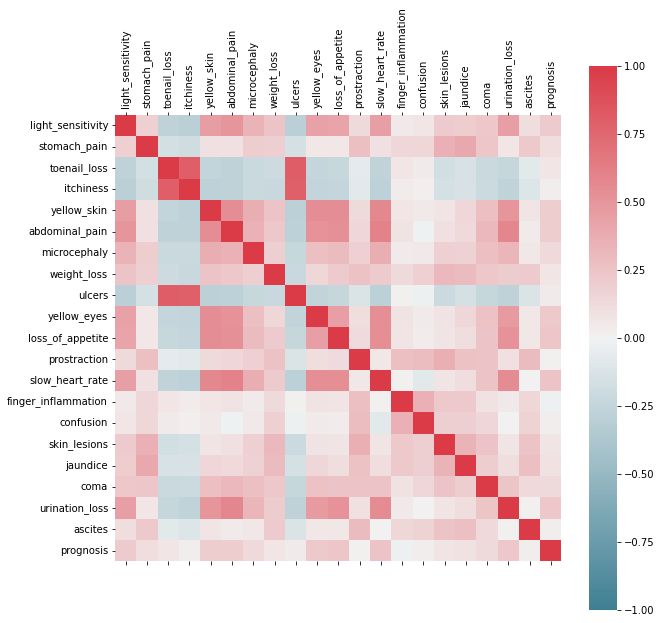

In [14]:
corr = df_new.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB

In [16]:
from lazypredict.Supervised import LazyClassifier

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

scaler=StandardScaler()

x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)

models,predictions = clf.fit(x_train, x_test, y_train, y_test)
models






 97%|█████████▋| 28/29 [00:04<00:00, 11.97it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000510 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 60
[LightGBM] [Info] Number of data points in the train set: 530, number of used features: 20
[LightGBM] [Info] Start training from score -2.422729
[LightGBM] [Info] Start training from score -2.444236
[LightGBM] [Info] Start training from score -2.113994
[LightGBM] [Info] Start training from score -2.583998
[LightGBM] [Info] Start training from score -2.776369
[LightGBM] [Info] Start training from score -2.583998
[LightGBM] [Info] Start training from score -2.265544
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.038771
[LightGBM] [Info] Start training from score -2.444236
[LightGBM] [Info] Start training from score -2.661959
[LightGBM] [Warning] No further splits with positive g

100%|██████████| 29/29 [00:05<00:00,  5.34it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NuSVC,0.37,0.36,None,0.35,0.11
BernoulliNB,0.33,0.33,None,0.30,0.02
CategoricalNB,0.33,0.33,None,0.30,0.05
NearestCentroid,0.33,0.33,None,0.30,0.03
SVC,0.33,0.33,None,0.31,0.09
CalibratedClassifierCV,0.32,0.32,None,0.26,1.69
RandomForestClassifier,0.32,0.31,None,0.30,0.35
RidgeClassifier,0.31,0.31,None,0.26,0.04
RidgeClassifierCV,0.31,0.31,None,0.26,0.03


<Figure size 1440x1080 with 0 Axes>

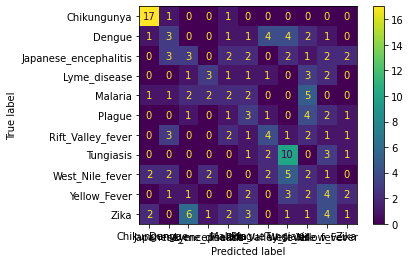

In [23]:
model=KNeighborsClassifier(5, weights='distance' )
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

plt.figure(figsize=(20,15))
confusion_matrix(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                       precision    recall  f1-score   support

          Chikungunya       0.74      0.89      0.81        19
               Dengue       0.21      0.18      0.19        17
Japanese_encephalitis       0.21      0.18      0.19        17
         Lyme_disease       0.38      0.25      0.30        12
              Malaria       0.17      0.13      0.15        15
               Plague       0.19      0.23      0.21        13
    Rift_Valley_fever       0.29      0.27      0.28        15
            Tungiasis       0.38      0.59      0.47        17
      West_Nile_fever       0.09      0.12      0.11        16
         Yellow_Fever       0.20      0.27      0.23        15
                 Zika       0.12      0.05      0.07        21

             accuracy                           0.29       177
            macro avg       0.27      0.29      0.27       177
         weighted avg       0.27      0.29      0.28       177



Accuracy: 0.29


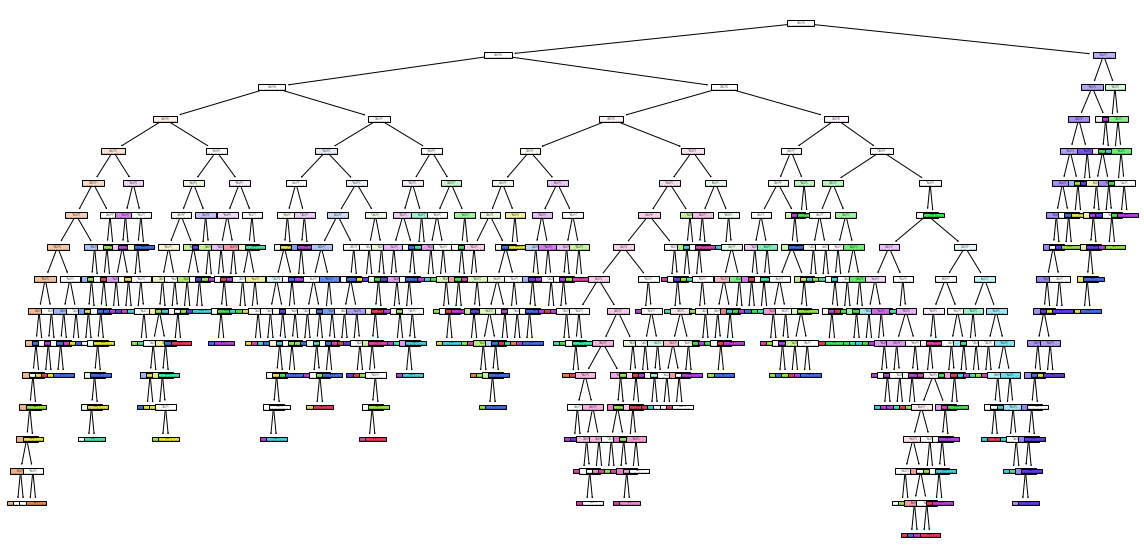

In [19]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


# Create Decision Tree model
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

# Evaluate the model
score = clf.score(x_test, y_test)
print(f"Accuracy: {score:.2f}")

#visualizacion del arbol creado
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True)
plt.show()

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest model
rf_clf = RandomForestClassifier(n_estimators=50)
rf_clf.fit(x_train, y_train)

# Evaluate the model
rf_score = rf_clf.score(x_test, y_test)
print(f"Accuracy: {rf_score:.2f}")

Accuracy: 0.28
